## Шаг 1

# Проект урока 4. Исследование данных и создание метрик
#  «Анализ данных о поездках на такси в Перу»

В этом проекте вы снова будете работать с данными по поездкам на такси, но теперь в Перу. Данные разделены на три датасета: в `passengers` информация о поездках со стороны пассажиров, в `drivers` — об этих же поездках со стороны водителей, в `taxi_2` — и та, и та информация, но о других поездках. В каждой строке каждого датасета — запись об одной поездке.

**Описание данных:**

passengers:
- journey_id – уникальный id поездки  
- user_id – id пользователя  
- start_type – тип заказа (asap, reserved, delayed)  
- start_lat – исходное местоположение пользователя, широта  
- start_lon – исходное местоположение пользователя, долгота  
- source – платформа, с которой сделан заказ  
- driver_score – какую оценку клиент поставил водителю  

drivers:
- journey_id – уникальный id поездки  
- driver_id – id водителя  
- taxi_id – id машины  
- icon – тип поездки  
- start_at – время начала поездки  
- end_at – время окончания поездки  
- end_lat – итоговое местоположение, широта  
- end_lon – итоговое местоположение, долгота  
- end_state – состояние заказа  
- driver_start_lat – исходное местоположение водителя, широта  
- driver_start_lon – исходное местоположение водителя, долгота  
- arrived_at – время прибытия водителя  
- rider_score – какую оценку водитель поставил клиенту  

Вы можете решать задания тем способом, который считаете наиболее удобным или оптимальным. А для того, чтобы лучше понять задание, следуйте по шагам выполнения. Бывает, что их можно выполнить в одну строчку, применяя методы друг за другом. А если выполняете шаги отдельно, не забудьте сохранить результат в переменную и в следующем шаге работать именно с ней.

В ноутбуке место для вашего решения обозначено комментарием `# Ваш код здесь`, но вы можете писать код где вам удобно, добавлять или удалять ячейки с кодом или текстом по вашему усмотрению.

Кроме того можно посмотреть подсказки, кликнув на строчку `► Нажмите сюда, чтобы увидеть подсказку`. Также не забывайте о наличии конспектов и возможности задать вопрос в Discord, ссылка на нужный тред есть на странице каждого шага в LMS

## Шаг 2

**Соберите первую часть данных.** Для этого прочитайте датасеты `passengers` и `drivers`. Объедините датафреймы в единый по ключу — колонке `journey_id`.

**Сколько столбцов с типом `object` у вас получилось в объединенном датафрейме?**

Шаги выполнения:
1. Импортируйте библиотеку pandas

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Для импорта библиотеки напишите:
```python
import library as shortcut
```
где вместо `library` подставьте название библиотеки, а вместо `shortcut` — её общераспространённое сокращённое название.
</p>
</details>

In [3]:
import pandas as pd

2. Загрузите два csv файла к уроку в свою папку в JupyterНub
3. Прочитайте эти датасеты, результаты сохранив в соответствующие переменные `passengers` и `drivers`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Датасеты находятся в файлах формата CSV. Для их чтения воспользуйтесь функцией `pd.read_csv()`, передав в качестве аргумента путь к файлу. Например,
```python
df = pd.read_csv('data.csv')
```
cчитает файл `data.csv`, хранящийся в той же папке, что и юпитер ноутбук, в котором вы сейчас работаете.
</p>
</details>

In [4]:
passengers = pd.read_csv('../data/passengers.csv',
                 encoding='windows-1251')
drivers = pd.read_csv('../data/drivers.csv',
                 encoding='windows-1251')

4. Посмотрите на содержимое датафреймов, проверьте размер каждой загруженной таблицы

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посмотреть на содержимое датафреймов?** Используйте метод `head()`

**Как проверить размер датафрейма?** Используйте атрибут `shape`, чтобы узнать количество строк и столбцов. Этот атрибут возвращает кортеж, первый элемент которого указывает на количество строк, а второй — на количество столбцов в датафрейме.  
      
**Как обратиться к атрибуту датафрейма?** Для этого нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df`
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [3]:
passengers.head(5)

,journey_id,user_id,start_type,start_lat,start_lon,source,driver_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0


5. Объедините датафреймы в единый по ключу - колонке `journey_id`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `merge`, чтобы объединить два датафрейма по колонке. Он применяется к первому из двух датафреймов и принимает как параметр второй датафрейм. Также можно указать, по какой колонке объединять и как. Например:

```python
df_new = df.merge(other_df, on='same_column', how='inner')
```
где
`other_df` — другой датафрэйм
`on` — параметр, принимающий название общей колонки в двух датафреймах, по которой нужно объединять
`how` — параметр, принимающий тип джойна
То есть тут мы объединили `df` с `other_df` по колонке `same_column` типом джойна `inner` (тип можно не указывать, по умолчанию определен `inner`) и результат сохранили в `df_new`.
</p>
</details>

In [3]:
df = passengers.merge(drivers, on='journey_id', how='inner')

6. Посмотрите на получившийся датафрейм, проверьте его размер

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посмотреть на содержимое датафреймов?** Используйте метод `head()`

**Как проверить размер датафрейма?** Используйте атрибут `shape`, чтобы узнать количество строк и столбцов. Этот атрибут возвращает кортеж, первый элемент которого указывает на количество строк, а второй — на количество столбцов в датафрейме.  
      
**Как обратиться к атрибуту датафрейма?** Для этого нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df`
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [5]:
df.shape

(11555, 19)

7. Посчитайте, сколько столбцов с типом `object` у вас получилось в объединенном датафрейме

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
Есть два способа узнать типы данных:
      
1) Используйте атрибут `dtypes`. Он возвращает серию, индексами которой являются названия столбцов, а значениями — тип данных в этих столбцах. Количество столбцов каждого типа нужно будет посчитать самостоятельно.  

Для обращения к атрибуту датафрейма нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df`.
      
2) Либо примените к датафрейму метод `info()`, который выводит подробную информацию о датафрейме и его колонках. Смотрите на предпоследнюю строчку, которая начинается с `dtypes:`, количество колонок каждого типа указаны в скобках.
      
Как использовать метод? Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11555 entries, 0 to 11554
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   journey_id        11555 non-null  object 
 1   user_id           11555 non-null  object 
 2   start_type        11555 non-null  object 
 3   start_lat         11555 non-null  object 
 4   start_lon         11555 non-null  object 
 5   source            11500 non-null  object 
 6   driver_score      3151 non-null   float64
 7   driver_id         8170 non-null   object 
 8   taxi_id           8170 non-null   object 
 9   icon              11555 non-null  object 
 10  start_at          11555 non-null  object 
 11  end_at            11284 non-null  object 
 12  end_lat           11555 non-null  object 
 13  end_lon           11555 non-null  object 
 14  end_state         11543 non-null  object 
 15  driver_start_lat  8164 non-null   object 
 16  driver_start_lon  8164 non-null   object

## Шаг 3

**Теперь первую часть данных (объединенный датафрейм) нужно соединить со второй частью из датасета `taxi_2`.** Для этого сначала прочитайте датасет `taxi_2`. После этого соедините (сконкатенируйте) первую (полученную на прошлом шаге) и вторую часть данных. **Датафрейм какого размера у вас получился?**

Шаги выполнения:
1. Загрузите csv файл `taxi_2` в свою папку в JupyterНub
2. Прочитайте этот датасет

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Датасет находится в файле формата CSV. Для чтения воспользуйтесь функцией `pd.read_csv()`, передав в качестве аргумента путь к файлу. Например,
```python
df = pd.read_csv('data.csv')
```
cчитает файл `data.csv`, хранящийся в той же папке, что и юпитер ноутбук, в котором вы сейчас работаете.
</p>
</details>

In [5]:
taxi = pd.read_csv('../data/taxi_2.csv',
                 encoding='windows-1251')

3. Посмотрите на содержимое датафрейма, проверьте размер загруженной таблицы

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посмотреть на содержимое датафрейма?** Используйте метод `head()`

**Как проверить размер датафрейма?** Используйте атрибут `shape`, чтобы узнать количество строк и столбцов. Этот атрибут возвращает кортеж, первый элемент которого указывает на количество строк, а второй — на количество столбцов в датафрейме.  
      
**Как обратиться к атрибуту датафрейма?** Для этого нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df`
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [6]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,b6206048fbda6d454ead4fa2b4b9beaf,d0de230345480ca6bcc86ce1eb89fbfa,40187316352d2c03ddc19e9c8ad7c514,42aa958edf790ef3d45823386fb734ea,executive,asap,2010-11-30 03:38:00,"-11,95227432","-76,81442261",2010-11-30 03:39:00,"40,4052887","-3,72117424",rider cancel,"-12,08863069","-76,96650439",NaN,iPhone,NaN,NaN
1,d2cf43d9f47c6512b84e1ea7b8746a0c,8e37a68fab5f31a5e2c1b5f77c6bb9e5,1d8ba0bdacccf2d0d70ee9925185d231,1d8ba0bdacccf2d0d70ee99251862c54,executive,reserved,2010-11-28 22:30:00,"-12,0495456","-77,1116799",2010-11-29 00:22:00,"-12,11973","-76,998734",drop off,"-12,04809647","-77,096405",2010-11-28 22:02:00,web,NaN,NaN
2,7c01cd25b39f4f8b234bf56d48a5e9c9,8e37a68fab5f31a5e2c1b5f77c6bb9e5,ecdcce0c956e266ed26c80fd9e5cbb8f,1d3c551d7fc3d0daf73f0a8c82781c2d,executive,reserved,2010-11-28 22:30:00,"-12,0511575","-77,1300437",2010-11-28 23:04:00,"-12,0794453","-77,0896372",drop off,0,0,2010-11-28 22:34:00,web,NaN,NaN
3,ab90a1bf4289d96e78d4a47d7cc2286d,1e639fc120efea2675ac138ebeac4c2f,12c472dd8efc6ed622ae8669251b82f1,c26f22be31323781fd478dbcf8926d44,executive,asap,2010-11-28 01:04:00,"-12,0979889","-77,0223812",2010-11-28 01:32:00,"-12,1192177","-77,0413569",drop off,"-12,08757569","-77,03611258",2010-11-28 01:15:00,web,NaN,4.0
4,d2cf43d9f47c6512b84e1ea7b8740874,2f1882c87731970df63e69d4bc254f96,3abce16ea601affbeae8f50584ce72ef,ab6ee368af1a9e1293acc0d14d1f9338,executive,reserved,2010-11-28 01:50:00,"-12,0903136","-77,0424105",2010-11-28 02:18:00,"43,5398067","-5,6575304",drop off,"-12,11418993","-77,03732522",2010-11-28 01:43:00,Wap,NaN,5.0


4. Соедините (сконкатенируйте) первую (полученную на прошлом шаге) и вторую часть данных. Для этого используйте функцию `concat` из библиотеки `pandas`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как использовать функцию `pd.concat`?** Передайте в неё список датафреймов, которые нужно соединить. Например:
```python
df_new = pd.concat([df_1, df_2])
```
соединит датафреймы `df_1` и `df_2` и сохранит результат в `df_new`
</p>
</details>

In [5]:
pd.concat([df, taxi], join="inner")



,journey_id,user_id,start_type,start_lat,start_lon,source,driver_score,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11551,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,reserved,"-12,08974075","-77,04699707",iPhone,5.0,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,2010-07-31 13:15:00,2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,5.0
11552,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,asap,"-12,09253011","-77,02875271",Android,NaN,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,2010-10-02 05:26:00,2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,5.0
11553,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,asap,"-12,1275637","-77,02642288",Android,0.0,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,2010-09-21 09:56:00,2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,0.0
11554,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,reserved,"-12,019468","-77,1077669",Android,NaN,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,2010-04-29 04:30:00,2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,5.0


5. Посмотрите на содержимое соединенного датафрейма, проверьте размер получившейся таблицы

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посмотреть на содержимое датафрейма?** Используйте метод `head()`

**Как проверить размер датафрейма?** Используйте атрибут `shape`, чтобы узнать количество строк и столбцов. Этот атрибут возвращает кортеж, первый элемент которого указывает на количество строк, а второй — на количество столбцов в датафрейме.  
      
**Как обратиться к атрибуту датафрейма?** Для этого нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df`
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [6]:
taxi = pd.concat([df, taxi], join="inner")

## Шаг 4

Теперь во всех заданиях будем работать с полным датафреймом, собранным из трех частей. Прежде чем перейдем к анализу этих данных, стоит узнать, есть ли в них пропущенные значения и как много. **Проверьте, в какой колонке датафрейма больше всего пропущенных значений.** Введите её название.

Шаги выполнения:
1. Примените к датафрейму два метода друг за другом: `isna()` и `sum()`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Как применить к датафрейму два метода друг за другом?** Используйте цепочку методов: напишите два метода подряд, поставив перед каждым точку. Например:
```python
df.some_method_1().some_method_2()
```   

Первым используйте метод `isna()`, вторым — `sum()`.
</p>
</details>

In [11]:
taxi.isna().sum()

journey_id              0
user_id                 0
start_type              0
start_lat               0
start_lon               0
source                123
driver_score        15461
driver_id            3385
taxi_id              3385
icon                    0
start_at                0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
rider_score          7721
dtype: int64

2. Определите, в какой колонке больше всего пропущенных значений

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Это можно сделать, посмотрев на значения глазами — код здесь не нужен.
</p>
</details>

## Шаг 5

Теперь перейдем к анализу данных и начнем с платформ. Посмотрите, какие платформы есть в наших данных. **В ответе укажите число уникальных названий платформ**

Шаги выполнения:
1. Посмотрите на уникальные названия платформ (см.колонку `source`)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `unique()`**, применив его к столбцу `source`. Этот метод возвращает уникальные значения в колонке.

**Как использовать метод?** Например, применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```
</p>
</details>

In [12]:
taxi.source.unique()

array(['iPhone', 'Android', 'web', 'iPad', nan, 'Wap'], dtype=object)

2. Посчитайте число уникальных названий платформ

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `nunique()`**, применив его к столбцу `source`. Этот метод возвращает число уникальных значений в колонке (пропущенные значения не считаются)

**Как использовать метод?** Например применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```
</p>
</details>

In [13]:
taxi.source.nunique()

5

## Шаг 6

Перейдем к анализу этих платформ. **Определите долю заказов, сделанных с той или иной платформы.** У какой платформы эта доля самая большая? **В ответе укажите значение наибольшей доли заказов в %, округлённое до целого.**

Шаги выполнения:  
1. Определите долю заказов, сделанных с той или иной платформы (см.колонку `source`), т.е. посчитайте отношение количества заказов с конкретной платформы ко всему количеству заказов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `value_counts()`**, применив его к столбцу `source`. Этот метод возвращает серию, где индексы — это уникальные значения из столбца, а значения — это число их встречаний (количество строк с таким значением).
      
**Как получить долю, а не число встречаний?** Обратите внимание на параметр `normalize` метода `value_counts`.

**Как использовать метод?** Например применим метод `some_method()` к колонке `column_name` датафрейма `df`, задав параметр `parametr`:
```python
df.column_name.some_method(parametr = False)
```
</p>
</details>

In [14]:
taxi.source.value_counts(normalize=True)

iPhone     0.423743
web        0.331956
Android    0.213546
iPad       0.024839
Wap        0.005916
Name: source, dtype: float64

2. Чтобы получить значения в %, умножьте получившуюся серию на 100

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Как умножить значение в серии?** Арифметические операции с пандасовскими сериями делаются очень просто - прямо как с числами. Например, этот код:
```python
series * 5
```
умножит все значения из серии `series` на 5
</p>
</details>

In [15]:
taxi.source.value_counts(normalize=True)*100

iPhone     42.374282
web        33.195580
Android    21.354620
iPad        2.483905
Wap         0.591613
Name: source, dtype: float64

3. Округлите получившиеся значения до целого числа

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `round()`, который округляет значения. По умолчанию округление идет до целого числа. Чтобы задать нужное число знаков после точки, передайте в метод аргумент - целое число. Например применим метод к серии `series`, задав округление до 5 знаков после точки:
```python
series.round(5)
```

Если хотите выполнять умножение и округление в одной строчке, то не забудьте взять произведение в скобки и после них применять `round()`.
</p>
</details>

In [16]:
round(taxi.source.value_counts(normalize=True)*100)

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

4. Посмотрите, с какой платформы было сделано больше всего заказов, и какова её доля в % (в ответе знак % указывать не нужно)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Это можно сделать просто глазами. По умолчанию метод `value_counts()` сортирует значения по убыванию. Соответственно, вам нужна самая первая строка.
</p>
</details>

## Шаг 7

Чтобы различие в количестве заказов с той или иной платформы было нагляднее, построим график. **Агрегируйте данные и постройте барчарт, где по оси `x` будет расположено название платформы (`source`), а по оси `y` – количество заказов (абсолютные значения, не доля).**

Выберите, какой график у вас получился?

*Если на графике не видны значения на осях, используйте светлую тему в JupyterHub или посмотрите графики на LMS*

![](https://storage.yandexcloud.net/klms-public/production/learning-content/65/801/6468/19025/78899/%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_10.png)

Шаги выполнения:  
1. Посчитайте количество заказов, сделанных с той или иной платформы (см.колонку `source`)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `value_counts()`**, применив его к столбцу `source`. Этот метод возвращает серию, где индексы — это уникальные значения из столбца, а значения — это число их встречаний (количество строк с таким значением).

**Как использовать метод?** Например применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```
</p>
</details>

In [17]:
taxi.source.value_counts()

iPhone     9741
web        7631
Android    4909
iPad        571
Wap         136
Name: source, dtype: int64

2. Чтобы перевести индекс в колонку, выполните сброс индекса

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы сбросить индекс, используйте метод `reset_index()`**, применив его к результату агрегации на прошлом шаге выполнения. Индексом станет дефолтная последовательность чисел от 0 до числа строк — 1. А те строки, которые раньше были в индексе, станут колонкой датафрейма. В данном случае она будет называться `index`.

**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [18]:
taxi.source.value_counts().reset_index()

,index,source
0,iPhone,9741
1,web,7631
2,Android,4909
3,iPad,571
4,Wap,136


3. Переименуйте колонки, чтобы они назывались в соответствии с теми данными, которые в них содержатся: названия платформ и количество заказов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Для переименования колонок, передайте в метод `rename()` в параметр `columns` словарь, где ключами являются старые названия колонок, а значениями - новые названия. Например:

```python
df = df.rename(columns=dictionary_name)
```
      
Если выполняете задание не в JupyterHub нашего курса, то переименование может и не понадобиться.      
</p>
</details>

In [19]:
platforms = taxi.source.value_counts().reset_index().rename(columns = {
    'index':'platform',
    'source': 'count_orders'
})

4. Импортируйте библиотеку `seaborn`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Для импорта библиотеки напишите
```python
import library as shortcut
```
где вместо `library` подставьте название библиотеки, а вместо `shortcut` — её общераспространённое сокращённое название.
</p>
</details>

In [20]:
import seaborn as sns

5. Постройте барплот с помощью функции `barplot` из библиотеки `seaborn` так, что по оси `x` будет расположено название платформы (`source`), а по оси `y` – количество заказов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Передайте в функцию `sns.barplot()` следующие параметры:  
      `data` — название датафрейма, в котором посчитано количество заказов для каждой платформы  
      `x` — название колонки с платформами в этом датафрейме  
      `y` — название колонки с количеством заказов в этом датафрейме
      
Например:      
```python
sns.barplot(data=df, x='col_1', y='col_2')
```
нарисует график на основе данных из датафрейма `df` так, что по оси х будут идти значения из `col_1`, а по оси y — соответствующие им значения из `col_2`.
</p>
</details>

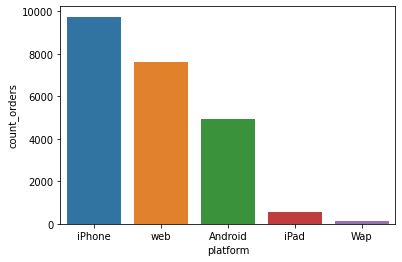

In [21]:
sns.barplot(data=platforms, x = 'platform', y = 'count_orders')

6. Импортируйте модуль `pyplot` из библиотеки `matplotlib`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>Для импорта модуля из библиотеки напишите

```python
import library.module as shortcut
```

где вместо `library` подставьте название библиотеки, вместо `module` — название модуля, а вместо `shortcut` — его общераспространённое сокращённое название
</p>
</details>

In [22]:
from matplotlib import pyplot as plt

7. Чтобы привести график к нужному виду, добавьте подписи к осям и уберите часть рамки

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как добавить подписи к осям?** Используйте функции `xlabel()` и `ylabel()` из модуля `pyplot` для того, чтобы задать названия оси `x` и `y` соответственно. Например, подпишем ось `х` как `the X-axis`:
```python
plt.xlabel('the X-axis')
```   
  
**Как убрать часть рамки?** Используйте функцию `despine()` из библиотеки `seaborn`, параметры задавать не нужно.
      
**Как использовать функцию из библиотеки `seaborn`?** Пример синтаксиса для функции `some_function`:
```python
sns.some_function()
```  
      
**Все эти функции пишите в той же ячейке, где запускаете функцию визуализации, ниже неё.**
</p>
</details>

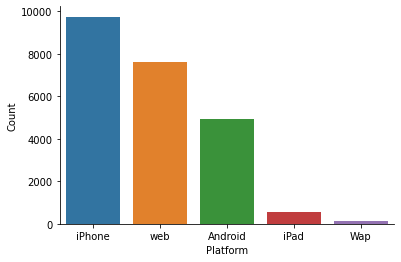

In [23]:
p = sns.barplot(data=platforms, x = 'platform', y = 'count_orders')
plt.xlabel('Platform')
plt.ylabel('Count')
sns.despine()

## Шаг 8

Более детально проанализируем распределение заказов по платформам. **С помощью функции `sns.countplot` и параметра `hue` визуализируйте распределение переменной `end_state` (итоговое состояние заказа) в разбивке по платформам (см.колонку `source`).**

**Выберите одно или несколько верных утверждений:**  
- Больше всего заказов со статусом drop off совершено с платформы iPhone  
- На Android количество отмененных поездок (rider cancel) меньше, чем на iPhone  
- На web отмененных поездок (rider cancel) меньше, чем на Android  
- Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы iPhone  
- Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы Android

Шаги выполнения:  
1. На основе неагрегированного датафрейма постройте график с помощью функции sns.countplot: по оси `x` расположите платформу, в качестве цвета столбца (параметр `hue`) используйте состояние заказа, а по оси `y` будет количество заказов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Передайте в функцию `sns.countplot()` следующие параметры:  
      `data` — название датафрейма  
      `x` — название колонки с платформами  
      `hue` — название колонки с состоянием заказа
      
Например:      
```python
sns.countplot(data = df, x = 'col_1', hue = 'col_2')
```
нарисует график на основе данных из датафрейма `df`, где по оси х будут идти значения из колонки `col_1`, а цвета столбцов определяться значениями в колонке `col_2`.
      
**Функция сама посчитает, сколько заказов того или иного состояния приходится на каждую платформу. Агрегировать данные не нужно**.
</p>
</details>

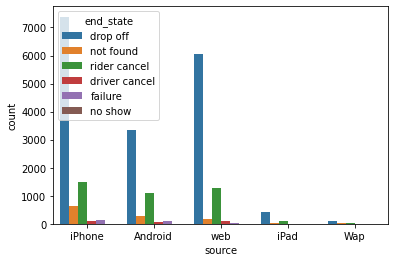

In [24]:
sns.countplot(data=taxi, x='source', hue='end_state')



2. Чтобы можно было прочитать график, увеличьте его размер

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте функцию `figure` с параметром `figsize` из модуля `pyplot`. В параметр передайте кортеж с масштабом графика формата (ширина, высота). Расположите функцию в начале той ячейки, в которой строите график. Например:
```python
plt.figure(figsize=(16,9))      
sns.countplot(data = df, x = 'col_1', hue = 'col_2')
```      
задаст размер графика как 16 дюймов в ширину и 9 дюймов в высоту.
</p>
</details>

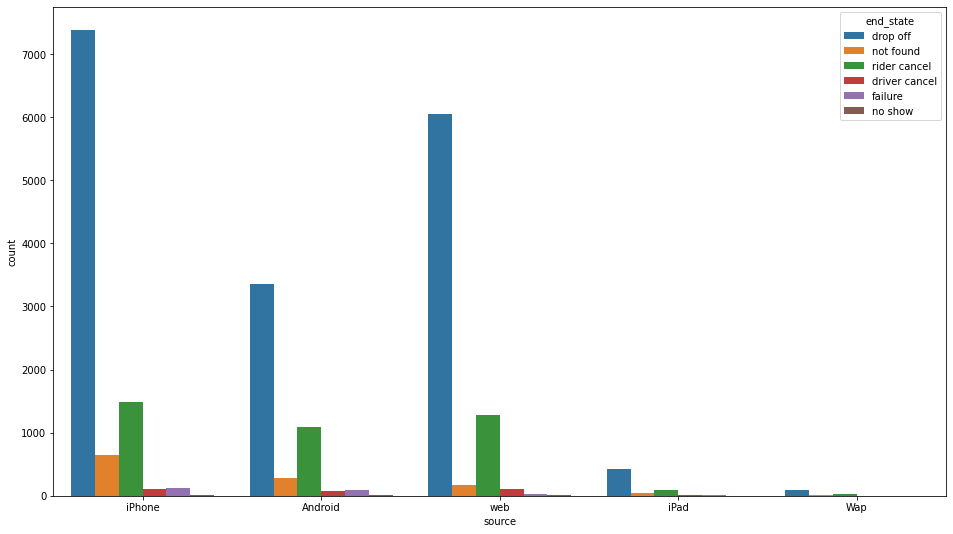

In [25]:
plt.figure(figsize=(16,9)) 
sns.countplot(data=taxi, x='source', hue='end_state')

3. Посмотрите на график и выберите верные утверждения

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Обратите внимание на легенду графика, в ней указано, какой цвет столбца к какому состоянию заказа относится.
</p>
</details>

## Шаг 9

С платформами разобрались. Теперь давайте перейдем к анализу оценок, которые ставят пассажиры водителям и водители пассажирам.

**Проверьте, как распределены оценки водителей (см.колонку `driver_score`)**. Для подготовки данных выполните следующие шаги:

1. Посчитайте *частоту* встречаемости каждой из оценок  
2. Переведите в проценты
3. Округлите до 2 знаков после точки  
4. Сбросьте индекс  
5. Переименуйте колонки в `driver_score` и `percentage`  
6. Отсортируйте датафрейм по колонке `driver_score` в порядке возрастания    
7. Запишите результат в переменную `driver_score_counts`

Может пригодиться:  
[mul()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mul.html) – умножение, более удобный вариант для использования в цепочке методов

**На LMS датафрейм сохранен в переменную `taxi`. Загрузите в LMS ваш код, в котором выполняете все эти шаги**

Шаги выполнения:  
1. Посчитайте частоту встречаемости каждой из оценок

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `value_counts()`**, применив его к столбцу `driver_score`. Этот метод возвращает серию, где индексы — это уникальные значения из столбца, а значения — это число их встречаний (количество строк с таким значением).
      
**Как получить частоту встречаемости, а не число встречаний?** Обратите внимание на параметр `normalize` метода `value_counts`.

**Как использовать метод?** Например применим метод `some_method()` к колонке `column_name` датафрейма `df`, задав параметр `parametr`:
```python
df.column_name.some_method(parametr = False)
```
</p>
</details>

In [26]:
taxi.driver_score.value_counts(normalize=True)

5.0    0.588105
4.0    0.218824
0.0    0.143007
3.0    0.029673
1.0    0.012288
2.0    0.008105
Name: driver_score, dtype: float64

2. Переведите в проценты, умножив частоту встречаемости на 100

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `mul()`**. Он умножает значения в серии на то число, которое подано в метод в качестве параметра. Например применим его к серии `series`, умножив значения в ней на 5:
```python
series.mul(5)
```
</p>
</details>

In [27]:
taxi.driver_score.value_counts(normalize=True)*100



5.0    58.810458
4.0    21.882353
0.0    14.300654
3.0     2.967320
1.0     1.228758
2.0     0.810458
Name: driver_score, dtype: float64

3. Округлите до двух знаков после точки

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `round()`, который округляет значения. По умолчанию округление идет до целого числа. Чтобы задать нужное число знаков после точки, передайте в метод аргумент — целое число. Например, применим метод к серии `series`, задав округление до пяти знаков после точки:
```python
series.round(5)
```

</p>
</details>

In [28]:
round(taxi.driver_score.value_counts(normalize=True)*100, 2)



5.0    58.81
4.0    21.88
0.0    14.30
3.0     2.97
1.0     1.23
2.0     0.81
Name: driver_score, dtype: float64

4. Сбросьте индекс

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы сбросить индекс, используйте метод `reset_index()`**. Индексом станет дефолтная последовательность чисел от 0 до числа строк - 1. А те строки, которые раньше были в индексе, станут колонкой датафрейма. В данном случае она будет называться `index`.

**Как использовать метод?** Например применим метод `some_method()` к серии `series`:
```python
series.some_method()
```
</p>
</details>

In [29]:
round(taxi.driver_score.value_counts(normalize=True)*100, 2).reset_index()



,index,driver_score
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


5. Переименуйте колонки в `driver_score` и `percentage`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Для переименования колонок, передайте в метод `rename()` в параметр `columns` словарь, где ключами являются старые названия колонок, а значениями — новые названия. Например:

```python
df = df.rename(columns=dictionary_name)
```
      
Задайте новые названия так, чтобы в колонке `driver_score` оказались оценки, поставленные водителям (от 0 до 5), а в колонке `percentage` — процент встречаемости этой оценки.
</p>
</details>

In [30]:
round(taxi.driver_score.value_counts(normalize=True)*100, 2).reset_index().rename(columns = {
    'index': 'driver_score',
    'driver_score': 'percentage'
})

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


6. Отсортируйте датафрейм по колонке `driver_score` в порядке возрастания (от 0 до 5)  

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `sort_values()`. Он сортирует строки по значениям в какой-то колонке. Например,

```python
df.sort_values('col_1', ascending=True)
```

отсортирует данные датафрейма `df` по значениям в колонке `col_1`. Параметр `ascending` отвечает за сортировку по возрастанию (True - по возрастанию, False - по убыванию)    

</p>
</details>

In [31]:
round(taxi.driver_score.value_counts(normalize=True)*100, 2).reset_index().rename(columns = {
    'index': 'driver_score',
    'driver_score': 'percentage'
}).sort_values(by='driver_score')



,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


7. Запишите результат в переменную `driver_score_counts`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Чтобы сохранить результат применения методов в переменную, напишите её название, поставьте знак = и слева от него напишите тот код, результат которого вы хотите сохранить. Например,

```python
df_new = df.some_method()
```
сохранит результат применения метода `some_method()` к датафрейму `df` в новый датафрейм `df_new`:   

</p>
</details>

In [32]:
driver_score_counts = round(taxi.driver_score.\
                            value_counts(normalize=True)*100, 2).\
                            reset_index().\
                            rename(columns = {
                                'index': 'driver_score',
                                'driver_score': 'percentage'
                                }).\
                            sort_values(by='driver_score')

8. Скопируйте и загрузите в LMS Ваш код со всех предыдущих шагов выполнения

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Если выполняли задание не в JupyterHub нашего курса, то LMS может не принять решение: в разных версиях библиотек колонки, получившиеся в результате применения `value_counts()`, могут иметь разные названия, а значит переименование колонок может не пройти. **В LMS колонку с названием `driver_score` нужно переименовать в `percentage`, а колонку `index` - в `driver_score`**

</p>
</details>

## Шаг 10

**Используем получившийся на прошлом шаге датафрейм `driver_score_counts`, чтобы построить круговую диаграмму (pie chart, пайчарт) и посмотреть на долю каждой оценки.** Чтобы получился график, как на скрине ниже, сделайте следующее:

1. Отсортируйте датафрейм по убыванию процентов каждой оценки,  
2. Используйте [функцию `pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) из модуля `pyplot` библиотеки `matplotlib`  
3. Задайте угол начала графика равным 90 (см.параметр `startangle`)
4. Поверните подписи к секторам (см.параметр `rotatelabels`)
5. Установите размер графика как (8,8)

**Выберите наиболее похожий график на тот, что получился у вас.**

*Если на графике не видны значения на осях, используйте светлую тему в JupyterHub или посмотрите графики на LMS*

A
![A](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37258/103292/490869/A.png)

B
![B](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37258/103292/490869/B.png)

C
![C](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37258/103292/490869/C.png)

D
![D](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37258/103292/490869/D.png)

*На будущее учтите, что круговая диаграмма может быть неудобна из-за того, что определить точные значения по ней сложно и нужно сравнивать между собой площади секторов. Подробнее об этом поговорим в модуле по визуализации*.

Шаги выполнения:  
1. Отсортируйте датафрейм `driver_score_counts` по убыванию процентов каждой оценки (см.колонку `percentage`)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `sort_values()`. Он сортирует строки по значениям в какой-то колонке. Например,

```python
df.sort_values('col_1', ascending=True, inplace = True)
```

отсортирует данные датафрейма `df` по значениям в колонке `col_1`. Параметр `ascending` отвечает за сортировку по возрастанию (True — по возрастанию, False — по убыванию), а параметр `inplace` — за перезапись исходного датафрейма (True — отсортированный датафрейм будет перезаписан в ту же переменную, False — не будет).

</p>
</details>

In [33]:
driver_score_counts.sort_values(by='percentage', ascending=False)



,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


2. Используйте [функцию `pie`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) из модуля `pyplot` библиотеки `matplotlib`, передав в неё колонку с процентами встречаемости каждой из оценок

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Передайте в функцию `plt.pie()` колонку с процентами встречаемости каждой из оценок (см.колонку `percentage` из датафрейма `driver_score_counts`)
      
Например:      
```python
plt.pie(df.col_1)
```
нарисует график на основе данных из колонки `col_1` датафрейма `df`
</p>
</details>

([<matplotlib.patches.Wedge at 0x7f1fb7e096d8>,
 [Text(0.9908514456470718, 0.4777168749993117, ''),
  Text(0.6513072907349324, 0.8864529389852135, ''),
  Text(0.5931976300476686, 0.9263458164777502, ''),
  Text(0.47927264443794526, 0.9900998597583271, ''),
  Text(-0.35630918583871474, 1.0406938858698807, ''),
  Text(-0.3005795092675981, -1.0581360775478974, '')])

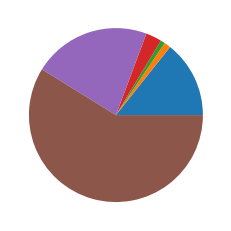

In [34]:
plt.pie(driver_score_counts.percentage)

3. Добавьте в функцию параметры: `startangle` равным 90 (отвечает за угол начала графика), `rotatelabels` равным True (поворачивает подписи к секторам), а в параметр `labels` передайте колонку с оценками датафрейма `driver_score_counts` (отвечает за подписи к секторам)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Передайте в функцию `plt.pie()` три параметра:** `startangle` равным 90, `rotatelabels` равным True, а в параметр `labels` передайте колонку с оценками (`driver_score`) датафрейма `driver_score_counts`
      
Например:      
```python
plt.pie(df.col_1, some_parameter = 5)
```
нарисует график на основе данных из колонки `col_1` датафрейма `df` с параметром `some_parameter` равным 5
</p>
</details>

([<matplotlib.patches.Wedge at 0x7f1fb7ddd710>,
 [Text(-0.4777168749993117, 0.9908514456470718, '0.0'),
  Text(-0.8864529389852132, 0.6513072907349327, '1.0'),
  Text(-0.9263458164777502, 0.5931976300476686, '2.0'),
  Text(-0.9900998597583271, 0.4792726444379453, '3.0'),
  Text(-1.0406938858698809, -0.35630918583871446, '4.0'),
  Text(1.0581360775478974, -0.30057950926759813, '5.0')])

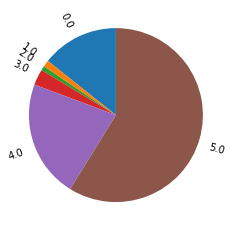

In [35]:
plt.pie(driver_score_counts.percentage, startangle=90, rotatelabels=True, labels=driver_score_counts.driver_score)



4. Установите размер графика как (8,8), задав параметр `figsize` в функции `figure` из модуля `pyplot`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте функцию `figure` с параметром `figsize` из модуля `pyplot`. В параметр передайте кортеж с масштабом графика формата (ширина, высота). Расположите функцию в начале той ячейки, в которой строите график. Например:
```python
plt.figure(figsize=(16,9))      
plt.bar()
```      
задаст размер графика как 16 дюймов в ширину и 9 дюймов в высоту
</p>
</details>

([<matplotlib.patches.Wedge at 0x7f1fb7dadc18>,
 [Text(-0.4777168749993117, 0.9908514456470718, '0.0'),
  Text(-0.8864529389852132, 0.6513072907349327, '1.0'),
  Text(-0.9263458164777502, 0.5931976300476686, '2.0'),
  Text(-0.9900998597583271, 0.4792726444379453, '3.0'),
  Text(-1.0406938858698809, -0.35630918583871446, '4.0'),
  Text(1.0581360775478974, -0.30057950926759813, '5.0')])

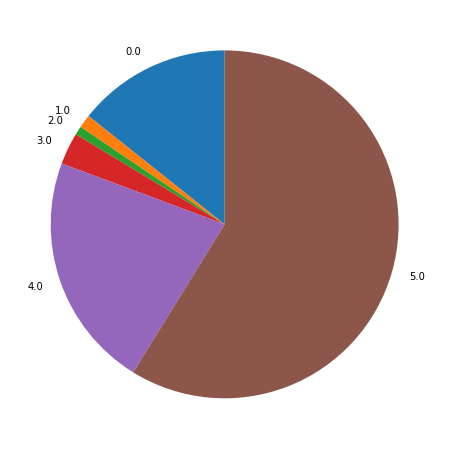

In [36]:
plt.figure(figsize=(8,8))
plt.pie(driver_score_counts.percentage, startangle=90, rotatelabels=False, labels=driver_score_counts.driver_score)



5. Выберите наиболее похожий график на тот, что получился у вас

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
    
Проверьте, что строите график на основе колонки с процентами встречаемости каждой из оценок и что вы добавили все нужные параметры
</details>

## Шаг 11

Сейчас повторите процесс из шага 9 и проанализируйте оценки водителями пассажиров (см.колонку `rider_score`). **Сравните распределение этих оценок с распределением оценок водителей.**

**Выберите одно или несколько верных утверждений:**  
- Более 20% оценок составляют 4  
- Более чем в 80% случаев водители поставили клиентам 5 звездочек  
- Водители ставят меньше оценок 0, чем клиенты  
- Водители ставят больше оценок 0, чем клиенты

Шаги выполнения:  
1. Сделайте все 7 шагов выполнения из задания с шага 9, но для оценок пассажиров (вместо колонки `driver_score` будет колонка `rider_score`): посчитайте *частоту* встречаемости каждой из оценок, переведите в проценты, округлите до 2 знаков после точки, сбросьте индекс, переименуйте колонки в `rider_score` и `percentage`, отсортируйте датафрейм по колонке `rider_score` в порядке возрастания, запишите результат в переменную `rider_score_counts`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Воспользуйтесь подсказками, данными к заданию в шаге 9. Помните, что вместо колонки `driver_score` вам нужна колонка `rider_score`.
      
</p>
</details>

In [37]:
rider_score_counts = round(taxi.rider_score.\
                            value_counts(normalize=True)*100, 2).\
                            reset_index().\
                            rename(columns = {
                                'index': 'rider_score',
                                'rider_score': 'percentage'
                                }).\
                            sort_values(by='rider_score')

rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


2. Если хотите, постройте график распределения оценок пассажиров (действуйте по аналогии с заданием из шага 10 или попробуйте улучшить тот график)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Код построения графика будет аналогичный тому, что у вас получился в задании шага 10. Помните, что вместо колонки `driver_score` вам нужна колонка `rider_score`
      
</p>
</details>

([<matplotlib.patches.Wedge at 0x7f1fb7d0d2b0>,
 [Text(1.0971545819372372, 0.0790684724408315, '0.0'),
  Text(1.0875687795972921, 0.16490648757782964, '1.0'),
  Text(1.0854106882624996, 0.178559899769032, '2.0'),
  Text(1.0752871445227457, 0.23185675928063929, '3.0'),
  Text(0.9473435503302017, 0.5590529470879916, '4.0'),
  Text(-1.0108975675274507, -0.43368895301481153, '5.0')])

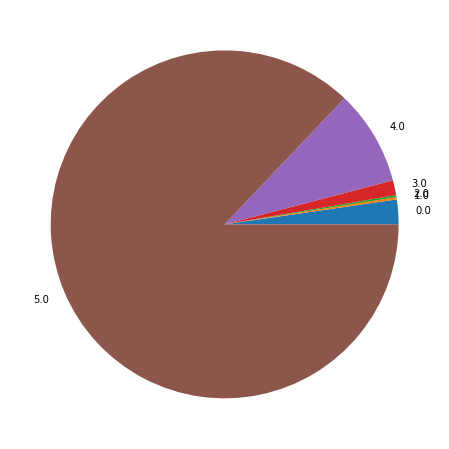

In [38]:
plt.figure(figsize=(8,8))
plt.pie(rider_score_counts.percentage, startangle=0, rotatelabels=False, labels=rider_score_counts.rider_score)

3. Посмотрите на оба датафрейма (распределения оценок пассажиров и водителей) и выберите верные утверждения

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Помните, что на этом шаге строили датафрейм с оценками, которые дают водители пассажирам, а в шаге 9 - датафрейм с оценками, которые дают пассажиры водителям
      
</p>
</details>

## Шаг 12

Теперь перейдем к анализу временнЫх данных. Но перед этим приведите столбцы `start_at`, `end_at`, `arrived_at` к формату даты и времени, используя [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html). Отфильтруйте данные и оставьте наблюдения со статусами заказа "asap" и "reserved" (см.колонку `start_type`). Результат сохраните в тот же датафрейм `taxi`  

**На LMS датафрейм сохранен в переменную `taxi`. Загрузите в LMS Ваш код, в котором приводите столбцы к формату datetime и оставляете в датафрейме `taxi` только наблюдения со статусами заказа «asap» и «reserved»**

Шаги выполнения:  
1. Прежде чем переводить столбцы к формату datetime, посмотрите на содержащиеся в них данные. Это необходимо, чтобы после смены типа данных вы могли убедиться, что всё получилось правильно    

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посмотреть на содержимое колонок?** Используйте метод `head()`
      
**Как использовать метод?** Например применим метод `some_method()` к колонкам `col_1` и `col_2` датафрейма `df`:
```python
df[['col_1', 'col_2']].some_method()
```
</p>
</details>

In [39]:
taxi = pd.read_csv('Data/taxi_2.csv',
                 encoding='windows-1251')
taxi[['start_type', 'start_at', 'end_at', 'arrived_at']].head(5)



,start_type,start_at,end_at,arrived_at
0,asap,2010-11-30 03:38:00,2010-11-30 03:39:00,NaN
1,reserved,2010-11-28 22:30:00,2010-11-29 00:22:00,2010-11-28 22:02:00
2,reserved,2010-11-28 22:30:00,2010-11-28 23:04:00,2010-11-28 22:34:00
3,asap,2010-11-28 01:04:00,2010-11-28 01:32:00,2010-11-28 01:15:00
4,reserved,2010-11-28 01:50:00,2010-11-28 02:18:00,2010-11-28 01:43:00


2. Приведите столбцы `start_at`, `end_at`, `arrived_at` к формату даты и времени, применив функцию [pd.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) к каждому значению в каждой из 3 колонок (это можно сделать с помощью метода `apply`)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Как применить функцию сразу к нескольким колонкам датафрейма?** Используйте метод `apply()`, применив его к нужным столбцам: `start_at`, `end_at`, `arrived_at`

**Как использовать метод?** Например применим метод `some_method()` к колонкам `col_1` и `col_2` датафрейма `df`:
```python
df[['col_1', 'col_2']].some_method()
```
      
**Как использовать функцию `pd.to_datetime`?** Подайте её как параметр в метод `apply()`. Например подадим функцию `some_function` в метод `some_method`, примененный к датафрейму `df`:
```python
df.some_method(some_function)
```    
      
**Куда сохранить результат смены типа данных в колонках?** Сохраните его в те же колонки. Например:
```python
df[['col_1', 'col_2']] = df[['col_1', 'col_2']].some_method()
```  
сохранит результат применения метода `some_method()` в те же колонки
</p>
</details>

In [10]:
taxi[['start_at', 'end_at', 'arrived_at']] = taxi[['start_at', 'end_at', 'arrived_at']].apply(lambda x: pd.to_datetime(x))



3. Посмотрите на получившиеся колонки и проверьте, что тип данных в них действительно изменился

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посмотреть на содержимое колонок?** Используйте метод `head()`
      
**Как использовать метод?** Например применим метод `some_method()` к колонкам `col_1` и `col_2` датафрейма `df`:
```python
df[['col_1', 'col_2']].some_method()
```
      
**Есть 2 способа узнать типы данных:**
      
1) Используйте атрибут `dtypes`. Он возвращает серию, индексами которой являются названия столбцов, а значениями — тип данных в этих столбцах. Количество столбцов каждого типа нужно будет посчитать самостоятельно.  

Для обращения к атрибуту датафрейма нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df`
      
2) Либо примените к датафрейму метод `info()`, который выводит подробную информацию о датафрейме и его колонках. Смотрите на предпоследнюю строчку, которая начинается с `dtypes:`, количество колонок каждого типа указаны в скобках
      
Как использовать метод? Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [41]:
taxi.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11556 entries, 0 to 11555
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        11556 non-null  object        
 1   user_id           11556 non-null  object        
 2   driver_id         11556 non-null  object        
 3   taxi_id           11556 non-null  object        
 4   icon              11556 non-null  object        
 5   start_type        11556 non-null  object        
 6   start_at          11556 non-null  datetime64[ns]
 7   start_lat         11556 non-null  object        
 8   start_lon         11556 non-null  object        
 9   end_at            11551 non-null  datetime64[ns]
 10  end_lat           11556 non-null  object        
 11  end_lon           11556 non-null  object        
 12  end_state         11556 non-null  object        
 13  driver_start_lat  11457 non-null  object        
 14  driver_start_lon  1145

4. Отфильтруйте данные и оставьте наблюдения со статусами заказа «asap» и «reserved» (см.колонку `start_type`). Результат сохраните в тот же датафрейм `taxi`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы отобрать только нужные записи, используйте метод `query()`**, внутри которого напишите строку с двойным условием: значение в колонке `start_type` равно 'asap' или значение в этой колонке равно 'reserved'.

**Как использовать метод?** Например, применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
      
Между условиями поставьте логический оператор: `and` (или `&`), если оба условия обязательно должны выполняться. Или оператор `or` (или `|`), если должно выполняться хотя бы одно из условий.
      
Учтите, что оба условия нужно писать в единых кавычках, а каждое условие и названия колонок — без кавычек. Целые числа и булевы значения (True, False) также пишутся без кавычек, а строки — в кавычках (двойных или одинарных — главное, не тех, в которые взяты оба условия)
      
Помните, что один знак равно означает присвоение, а два — проверку на равенство.
      
</p>
</details>

In [42]:
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')
taxi[['start_at', 'end_at', 'arrived_at']]

,start_at,end_at,arrived_at
0,2010-11-30 03:38:00,2010-11-30 03:39:00,NaT
1,2010-11-28 22:30:00,2010-11-29 00:22:00,2010-11-28 22:02:00
2,2010-11-28 22:30:00,2010-11-28 23:04:00,2010-11-28 22:34:00
3,2010-11-28 01:04:00,2010-11-28 01:32:00,2010-11-28 01:15:00
4,2010-11-28 01:50:00,2010-11-28 02:18:00,2010-11-28 01:43:00
...,...,...,...
11551,2010-07-31 13:15:00,2010-07-31 13:27:00,2010-07-31 13:15:00
11552,2010-10-02 05:26:00,2010-10-02 05:56:00,2010-10-02 05:39:00
11553,2010-09-21 09:56:00,2010-09-21 10:18:00,2010-09-21 10:05:00
11554,2010-04-29 04:30:00,2010-04-29 05:11:00,2010-04-29 04:23:00


5. Скопируйте и загрузите в LMS Ваш код, в котором приводите столбцы к формату datetime и оставляете в датафрейме `taxi` только наблюдения со статусами заказа "asap" и "reserved"

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Вам нужен код со 2 и 4 шагов выполнения
      
</p>
</details>

## Шаг 13

Начнем анализировать время подачи машины — долго ли пассажирам приходится ждать такси. Для этого создайте новую колонку `wait_time`, в которой будет храниться разница между временем подачи машины (см.колонку `arrived_at`) и временем заказа (см.колонку `start_at`). **Определите медианное время подачи машины, в минутах. Ответ дайте в формате целого числа**

Шаги выполнения:  
1. Создайте новую колонку `wait_time`, в которой будет храниться разница между временем подачи машины (см.колонку `arrived_at`) и временем заказа (см.колонку `start_at`)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Как создать новую колонку?** достаточно написать такой код:
```python
df['new_column'] = some_value
```
где `df` — датафрейм, `new_column` — название новой колонки, `some_value` — то, чему будет равна колонка (это может быть одно число или колонка датафрейма, где число элементов такое же как число строк в `df`).
      
**Как посчитать разницу значений в двух колонках?** Арифметические операции с пандасовскими колонками делаются очень просто, прямо как с питоновскими числами. Например, этот код:
```python
df.column1 * df.column2
```
умножит все значения из колонки `column1` датафрейма `df` на соответствующие элементы колонки `column2`. Число элементов в обеих колонках должно быть одинаковым.
      
</p>
</details>

In [11]:
taxi[['wait_time']] = taxi.arrived_at - taxi.start_at

2. Посчитайте медианное время подачи машины

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `median()`, применив его к столбцу `wait_time`**.

**Как использовать метод?** Например применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```
</p>
</details>

In [44]:
taxi.wait_time.median()

Timedelta('0 days 00:05:00')

## Шаг 14

Если клиент сделал заказ к определенному времени (`start_type` == 'reserved'), но ему пришлось ждать машину (`wait_time` > 0), значит, водитель опоздал. **Определите id водителя, который чаще всего опаздывал на заказы, заранее сделанные клиентами**

Обратите внимание, данные в колонке `wait_time` имеют тип `timedelta` — разница во времени. Чтобы корректно отобрать записи об опозданиях, вам понадобится не целое число 0, а разница во времени, равная 0. Такую переменную можно создать с помощью функции [pd.to_timedelta](https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html), которая конвертирует подаваемый в неё аргумент в значение с типом `timedelta`

Шаги выполнения:  
1. Используя функцию [pd.to_timedelta](https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html), создайте переменную, в которой будет храниться разница во времени, равная 0

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
    
**Как использовать функцию `pd.to_timedelta`?** Подайте в неё единственный аргумент — число 0
      
**Куда сохранить результат применения этой функции?** Сохраните его новую переменную. Например:
```python
new_variable = pd.to_timedelta(argument)
```  
сохранит результат функции `pd.to_timedelta` с аргументом `argument` в переменную `new_variable`
</p>
</details>

In [45]:
diff_zero = pd.to_timedelta(0)

2. Оставьте только записи, где `start_type` == 'reserved' и `wait_time` больше, чем разница во времени, равная 0

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы отобрать только нужные записи, используйте метод `query()`**, внутри которого напишите строку с двойным условием: значение в колонке `start_type` равно 'reserved' и значение в колонке `wait_time` больше, чем разница во времени, равная 0.

**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
      
Между условиями поставьте логический оператор: `and` (или `&`), если оба условия обязательно должны выполняться. Или оператор `or` (или `|`), если должно выполняться хотя бы одно из условий.
      
Учтите, что оба условия нужно писать в единых кавычках, а каждое условие и названия колонок — без кавычек. Целые числа и булевы значения (True, False) также пишутся без кавычек, а строки — в кавычках (двойных или одинарных - главное, не тех, в которые взяты оба условия)
      
Помните, что один знак равно означает присвоение, а два — проверку на равенство.
      
**Для сравнения с разницей во времени используйте переменную, созданную на 1 шаге выполнения.** Чтобы обратиться к ней внутри `query()`, поставьте перед названием переменной`@`. Например:
```python
df.query('col_1 == @some_variable')
```
выберет только те значения в колонке `col_1` датафрейма `df`, которые равны значению в переменной `some_variable`

Если фильтруете через loc, ставить `@` не нужно.

Если выполняете задание не в JupyterHub нашего курса, то может возникнуть ошибка `ValueError: unknown type object`, тогда в методе `query` задайте параметр `engine='python'`.         
</p>
</details>

In [46]:
taxi.query('start_type == "reserved" and wait_time < @diff_zero')

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
1,d2cf43d9f47c6512b84e1ea7b8746a0c,8e37a68fab5f31a5e2c1b5f77c6bb9e5,1d8ba0bdacccf2d0d70ee9925185d231,1d8ba0bdacccf2d0d70ee99251862c54,executive,reserved,2010-11-28 22:30:00,"-12,0495456","-77,1116799",2010-11-29 00:22:00,"-12,11973","-76,998734",drop off,"-12,04809647","-77,096405",2010-11-28 22:02:00,web,NaN,NaN,-1 days +23:32:00
4,d2cf43d9f47c6512b84e1ea7b8740874,2f1882c87731970df63e69d4bc254f96,3abce16ea601affbeae8f50584ce72ef,ab6ee368af1a9e1293acc0d14d1f9338,executive,reserved,2010-11-28 01:50:00,"-12,0903136","-77,0424105",2010-11-28 02:18:00,"43,5398067","-5,6575304",drop off,"-12,11418993","-77,03732522",2010-11-28 01:43:00,Wap,NaN,5.0,-1 days +23:53:00
10,cd6fba80de11849ce566009f41dd4480,8e37a68fab5f31a5e2c1b5f77c6bb9e5,ecdcce0c956e266ed26c80fd9e5cbb8f,1d3c551d7fc3d0daf73f0a8c82781c2d,executive,reserved,2010-11-29 12:45:00,"-12,0794453","-77,0896372",2010-11-29 13:35:00,"-12,0477619","-77,0911556",drop off,"-12,07735953","-77,07495019",2010-11-29 12:35:00,web,NaN,NaN,-1 days +23:50:00
11,d51ec809ccecd882cbdb357b5a50c937,8e37a68fab5f31a5e2c1b5f77c6bb9e5,1d8ba0bdacccf2d0d70ee9925185d231,1d8ba0bdacccf2d0d70ee99251862c54,executive,reserved,2010-11-29 22:30:00,"-12,0477619","-77,0911556",2010-11-29 23:20:00,"-12,1311697","-77,0108557",drop off,"-12,07398787","-77,08699008",2010-11-29 22:19:00,web,NaN,NaN,-1 days +23:49:00
12,d51ec809ccecd882cbdb357b5a50e21d,8e37a68fab5f31a5e2c1b5f77c6bb9e5,ec84a73745199ff840ecafcb924383ad,ec84a73745199ff840ecafcb9283193f,executive,reserved,2010-11-29 17:30:00,"-12,0477619","-77,0911556",2010-11-29 18:59:00,"-12,0900539","-76,9834274",drop off,"-12,04904079","-77,11185694",2010-11-29 17:25:00,web,NaN,NaN,-1 days +23:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11521,c1e6662a9702c8ef6c1fec12fffc0f32,9bee7199562ab02e239aa60c0aadadfb,eeb07ac5409c082354b923689341b9ec,aba044a086704ad7e9dc66b8c926408d,executive,reserved,2010-03-22 00:30:00,"-12,0194682","-77,1077685",2010-03-22 01:35:00,"-12,0964287","-77,0380059",drop off,"-12,02229557","-77,09973206",2010-03-22 00:25:00,web,NaN,5.0,-1 days +23:55:00
11535,28cade33030030916641531bb9da18ff,4fa4663617535c5352a80422490b11a1,593ae49af455f324457edc1472ae6cce,593ae49af455f324457edc1472ece6ee,executive,reserved,2010-08-27 04:40:00,"-12,02651215","-77,10668945",2010-08-27 05:03:00,"-12,02371216","-76,9937439",drop off,"-12,04567024","-77,0986883",2010-08-27 04:30:00,iPhone,NaN,5.0,-1 days +23:50:00
11538,c21605b791b47423867a99d06f8220ac,35e7f74c2fbd27db816811036af892e5,b68895736389f2949faa8c73555b81ac,b68895736389f2949faa8c7355bdb902,executive,reserved,2010-04-08 15:30:00,"-12,126993","-77,0269995",2010-04-08 17:03:00,"-12,0888973","-77,0273633",drop off,"-12,11737237","-77,03124778",2010-04-08 15:26:00,web,NaN,NaN,-1 days +23:56:00
11548,2ca7077f2fa5233904198635ad62955a,78851a91f305d3ed7bb3cc0111e073aa,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-06-26 21:30:00,"-12,0933609","-77,02246094",2010-06-26 21:24:00,"-12,10605621","-77,02020264",drop off,"-12,099756","-77,01222897",2010-06-26 21:16:00,iPhone,5.0,5.0,-1 days +23:46:00


3. Посчитайте количество оставшихся записей для каждого водителя

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `value_counts()`**, применив его к столбцу `driver_id`. Этот метод возвращает серию, где индексы — это уникальные значения из столбца, а значения — это число их встречаний (количество строк с таким значением).
      
**Как использовать метод?** Например применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```
</p>
</details>

In [47]:
taxi.query('start_type == "reserved" and wait_time > @diff_zero').driver_id.value_counts()

56f59b58bcbbd1cdabc3652e713134c2    50
c814db2127582cf95dea1f74f43127c2    45
ff5c924e0b630fd7c019a4234059fdf4    42
eef4aeee867d60d44e1d077d16054b6a    37
406921adcca37705ef527b4246c0cfea    35
                                    ..
2ca81f8112b8c60af222ee2ed746de12     1
b68895736389f2949faa8c73555b81ac     1
12c472dd8efc6ed622ae8669251b82f1     1
9db6243faff23197787d1efc5f93904d     1
fdba41f4b66d90ed7863fce32b97a19f     1
Name: driver_id, Length: 80, dtype: int64

4. Определите id водителя, который чаще всего опаздывал на заказы

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `idxmax()`.

Как использовать метод? Например применим метод `some_method()` к серии `series`:
```python
series.some_method()
```
</p>
</details>

In [8]:
taxi.query('start_type == "reserved" and wait_time > @diff_zero').driver_id.value_counts().idxmax()

UndefinedVariableError: name 'wait_time' is not defined

## Шаг 15

**Подумайте, что может влиять на число опозданий водителя из прошлого задания.** Проанализируйте имеющиеся у вас данные и выберите один или несколько вариантов:  
- Число взятых заказов  
- Оценки, поставленные этим водителем его пассажирам  
- Непунктуальность водителя (доля опозданий от всех его поездок у этого водителя больше, чем соответствующие доли у всех остальных водителей)
- Цвет его машины

Шаги выполнения:  
1. Проверьте гипотезу, что на количество опозданий водителя повлияло число взятых им заказов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Посмотрите на топ водителей по числу поездок и топ опаздывающих водителей — пересекаются ли они?
</p>
</details>

In [49]:
# Число поездок
total_orders = taxi.query('start_type == "reserved"').driver_id.value_counts()
# Число опозданий
late_orders = taxi.query('start_type == "reserved" and wait_time > @diff_zero').driver_id.value_counts()
round((late_orders/total_orders).sort_values(ascending=False)*100, 0).head(10)

7bf79d646d318c67421797bb50001810    100.0
38e92872d3aa0417293e90d813f99d65     80.0
b4f2c132de1648fecf41bb1651525c91     67.0
8a122c8845dc5eebe7d584eb30428057     50.0
6149ad309c203f14b7f56a106a9b32c6     50.0
784a730957c6e05508e71c604ac92700     50.0
8ff94ac5183d99dc41b042ad5cb1e655     48.0
1083bcecf6e3df9df65525ec3a66b5fb     44.0
593ae49af455f324457edc1472aee6ad     42.0
56f59b58bcbbd1cdabc3652e713134c2     39.0
Name: driver_id, dtype: float64

2. Проверьте гипотезу о том, что на количество опозданий водителя повлияли оценки, поставленные этим водителем его пассажирам

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Подумайте, могли ли такие оценки повлиять на время подачи машины
</p>
</details>

In [50]:
# taxi.groupby('driver_id').rider_score.value_counts()['406921adcca37705ef527b4246c0cfea']

3. Проверьте гипотезу о том, что на количество опозданий водителя повлияла непунктуальность водителя (опаздывает чаще остальных)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Посмотрите на долю опозданий нашего водителя — больше ли она у него, чем у большинства других водителей.
</p>
</details>

In [51]:
# Ваш код здесь



4. Проверьте гипотезу о том, что на количество опозданий водителя повлиял цвет его машины

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Подумайте, мог ли цвет машины повлиять на время её подачи
</p>
</details>

Цвет машины не влияет на количество опозданий водителя

## Шаг 16

С опозданиями разобрались. Теперь расширим наши данные новыми признаками: **добавьте столбец `month`, где будет храниться номер месяца, в котором был сделан заказ (см.колонку `start_at`),  и столбец `weekday` – название дня недели.**

**На LMS датафрейм сохранен в переменную `taxi`. Загрузите в LMS Ваш код, в котором создаете столбцы `month` и `weekday`**

Шаги выполнения:  
1. Создайте столбец `month`, где будет храниться номер месяца, в котором был сделан заказ (см.колонку `start_at`)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Чтобы получить номер месяца, используйте аксессор `dt` и укажите период `month`. Например:
```python
df.col_datetime.dt.day
```    
вернет номера дней в колонке `col_datetime` с типом данных datetime
</p>
</details>

In [12]:
taxi['month'] = taxi['start_at'].dt.month


2. Создайте столбец `weekday`, где будет храниться название дня недели, в котором был сделан заказ

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Чтобы получить название дня недели, используйте аксессор `dt` и укажите период `day_name()`. Например:
```python
df.col_datetime.dt.month_name()
```    
вернет название месяцев в колонке `col_datetime` с типом данных datetime
</p>
</details>

In [13]:
taxi['weekday'] = taxi['start_at'].dt.day_name()

3. Посмотрите на колонку `start_at` и новые колонки — всё ли правильно получилось

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посмотреть на содержимое колонок?** Используйте метод `head()`
      
**Как использовать метод?** Например применим метод `some_method()` к колонкам `col_1` и `col_2` датафрейма `df`:
```python
df[['col_1', 'col_2']].some_method()
```
</p>
</details>

In [14]:
taxi[['start_at', 'month', 'weekday']]

,start_at,month,weekday
0,2010-11-16 16:44:00,11,Tuesday
1,2010-06-01 00:34:00,6,Tuesday
2,2010-05-31 05:01:00,5,Monday
3,2010-06-01 00:29:00,6,Tuesday
4,2010-09-11 23:55:00,9,Saturday
...,...,...,...
11551,2010-07-31 13:15:00,7,Saturday
11552,2010-10-02 05:26:00,10,Saturday
11553,2010-09-21 09:56:00,9,Tuesday
11554,2010-04-29 04:30:00,4,Thursday


4. Скопируйте и загрузите в LMS Ваш код, в котором создаете столбцы `month` и `weekday`

## Шаг 17

Изучим, есть ли сезонные колебания в заказах такси. **Постройте график количества заказов по месяцам и определите месяц с наименьшим количеством заказов летом.**

Шаги выполнения:  
1. Постройте график количества заказов по месяцам, используя созданную на прошлом шаге колонку `month`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Передайте в функцию `sns.countplot()` следующие параметры:  
      `data` — название датафрейма  
      `x` — название колонки с номерами месяцев  
      
Например:      
```python
sns.countplot(data = df, x = 'col_1')
```
нарисует график на основе данных из датафрейма `df`, где по оси х будут идти значения из колонки `col_1`.
      
**Функция сама посчитает, сколько заказов пришлось на каждый месяц. Агрегировать данные не нужно**
</p>
</details>

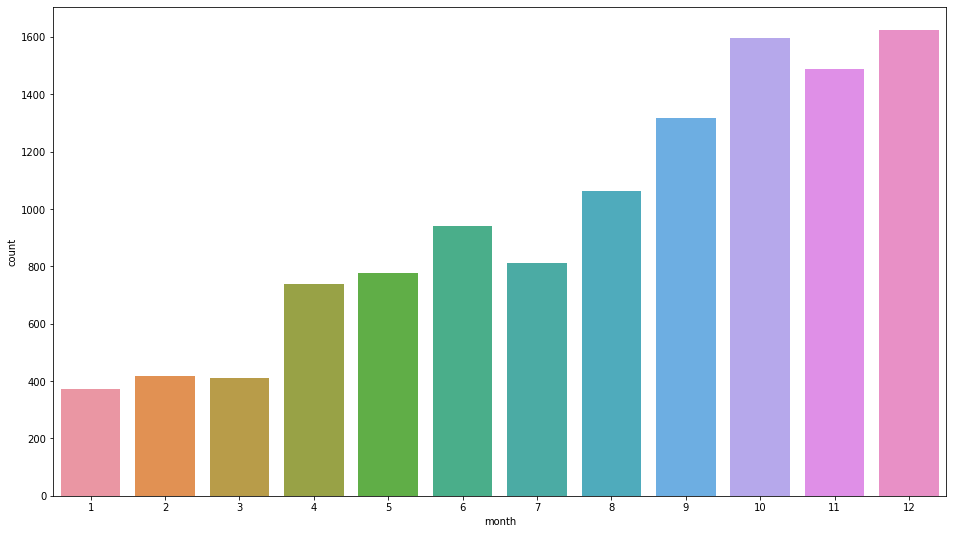

In [74]:
plt.figure(figsize=(16,9)) 
sns.countplot(data=taxi, x='month')



2. Посмотрите на график: есть ли сезонные колебания? В какой из летних месяцев количество заказов было наименьшим?

## Шаг 18

Сезонность бывает не только внутри года, но и внутри недели. **Определите, в какой день недели поступает меньше всего заказов.** Укажите то название, которое написано в самом датафрейме.

Для этого постройте аналогичный график по дням недели (см. колонку `weekday`). Задать порядок столбиков на графике можно с помощью параметра `order`, которому нужно передать список названий в нужном порядке.

Шаги выполнения:  
1. Постройте график количества заказов по дням недели, используя созданную на позапрошлом шаге колонку `weekday`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Передайте в функцию `sns.countplot()` следующие параметры:  
      `data` — название датафрейма  
      `x` — название колонки с названиями дней недели  
      
Например:      
```python
sns.countplot(data = df, x = 'col_1')
```
нарисует график на основе данных из датафрейма `df`, где по оси х будут идти значения из колонки `col_1`.
      
**Функция сама посчитает, сколько заказов пришлось на каждый день недели. Агрегировать данные не нужно**
</p>
</details>

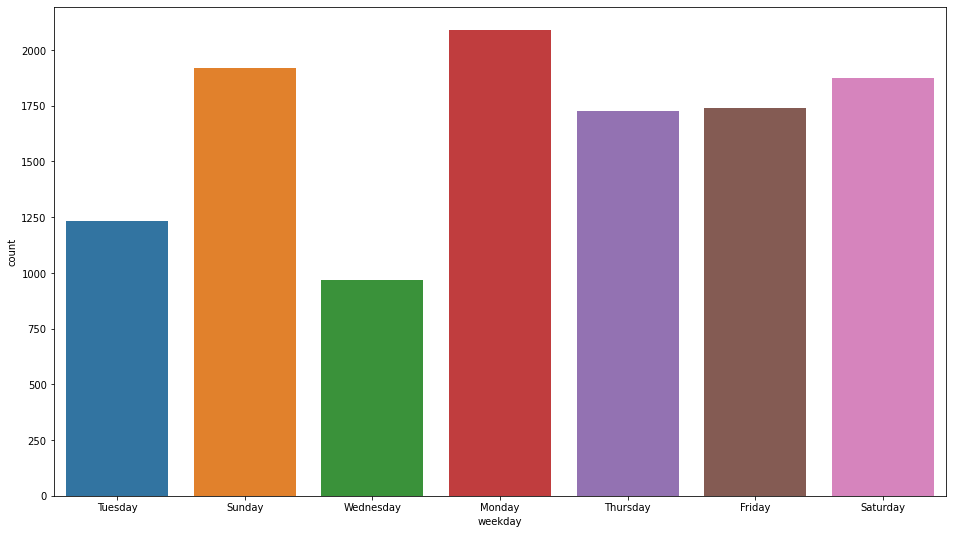

In [75]:
plt.figure(figsize=(16,9)) 
sns.countplot(data=taxi, x='weekday')



2. Для удобства чтения графика увеличьте его размер и задайте порядок столбцов с помощью параметра `order`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы увеличить размер графика, используйте функцию `figure` с параметром `figsize` из модуля `pyplot`.** В параметр передайте кортеж с масштабом графика формата (ширина, высота). Расположите функцию в начале той ячейки, в которой строите график. Например:
```python
plt.figure(figsize=(16,9))      
sns.countplot(data = df, x = 'col_1')
```      
задаст размер графика как 16 дюймов в ширину и 9 дюймов в высоту.
      
**Чтобы задать порядок столбцов, передайте в параметр `order` функции `sns.countplot` список с названиями дней недели в нужном порядке.** Напишите их в том виде, в каком они есть в датафрейме. Например,
```python
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
```
построит график со столбцами в таком порядке: сначала `One`, потом `Two` и последним `Three`.
</p>
</details>

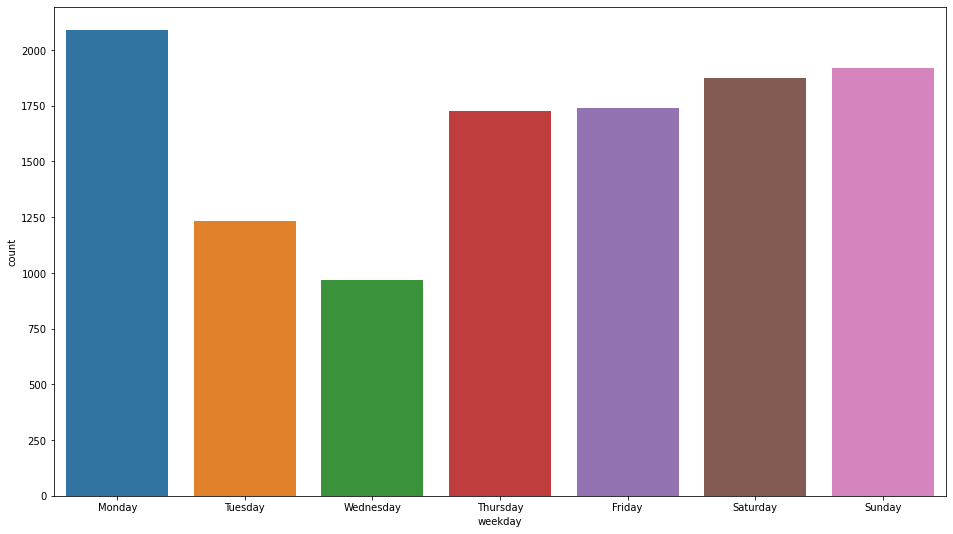

In [76]:
plt.figure(figsize=(16,9)) 
sns.countplot(data=taxi, x='weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])



3. Посмотрите на график и определите, в какой день недели поступает меньше всего заказов

## Шаг 19

Познакомимся с часто используемыми метриками, показывающими число активных пользователей за определённый период:

DAU (daily active users) – число уникальных активных пользователей за день  
WAU (weekly active users) – число уникальных активных пользователей за неделю  
MAU (monthly active users) – число уникальных активных пользователей за месяц

Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени.

**Посчитайте метрику MAU, постройте её график и выберите одно или несколько верных утверждений:**  
- Число уникальных юзеров в течение года как увеличивалось, так и уменьшалось  
- MAU за апрель примерно в 2.5 раза больше, чем за январь  
- В течение всего года число уникальных пользователей увеличивалось  
- Летом наблюдался спад числа уникальных пользователей в месяц

Шаги выполнения:
1. Посчитайте метрику MAU — число уникальных активных пользователей за месяц

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Сгруппируйте данные по столбцу `month`, используя метод `groupby()`**. Его вызов группирует строки по значениям в какой-то колонке (или комбинации значений из нескольких колонок). Например,

```python
df.groupby('col_1')
```
сгруппирует данные датафрейма `df` по колонке `col_1`. Сама по себе группировка не вычисляет что-то по группам.

**После группировки используйте метод `nunique()`**, применив его к столбцу `user_id`. Этот метод возвращает число уникальных значений в колонке (пропущенные значения не считаются)

**Как использовать метод?** Например применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```
</p>
</details>

In [20]:
taxi.groupby(by='month').user_id.nunique()



month
1     102
2     111
3     163
4     254
5     275
6     309
7     318
8     377
9     416
10    437
11    504
12    569
Name: user_id, dtype: int64

2. На основе получившихся данных постройте линейную диаграмму

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Примените к получившимся данным аксессор `plot` и метод `line()` из библиотеки `pandas`. Например:
```python
series.plot.line()
```      
построит линейную диаграмму на основе данных из серии `series`
</p>
</details>

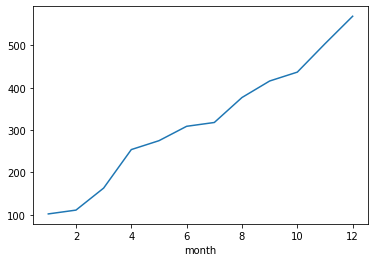

In [21]:

taxi.groupby(by='month').user_id.nunique().plot.line()


3. Посмотрите на график и выберите одно или несколько верных утверждений

## Итоги

В этом проекте вы собрали воедино и проанализировали данные о поездках на такси в Перу в разрезе по платформам, построили графики и сравнили оценки водителей и пассажиров, определили самого опаздывающего водителя и причины его опозданий, посмотрели на годовую и недельную сезонность заказов, проанализировали метрику MAU. В процессе вы закрепили навыки работы с временнЫми данными и библиотеками pandas, seaborn и matplotlib.